In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sample-insurance-claim-prediction-dataset/insurance2.csv
/kaggle/input/sample-insurance-claim-prediction-dataset/insurance3r2.csv


https://becominghuman.ai/machine-learning-model-for-predicting-insurance-claim-charge-945bf27a681c

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('../input/sample-insurance-claim-prediction-dataset/insurance2.csv')

In [4]:
dataset.drop('insuranceclaim', axis=1, inplace=True)


In [5]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [6]:
dataset.shape

(1338, 7)

Text(0.5, 1.0, 'Age vs Charges')

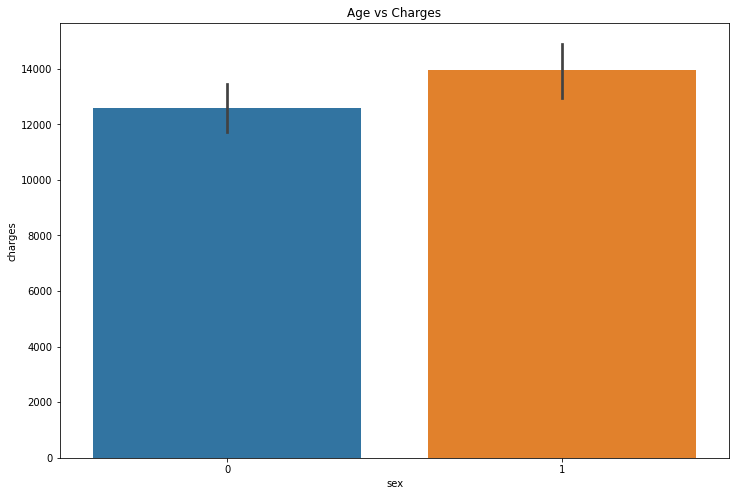

In [7]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'sex', y = 'charges', data = dataset)
plt.title("Age vs Charges")

Text(0.5, 1.0, 'Age vs Charges')

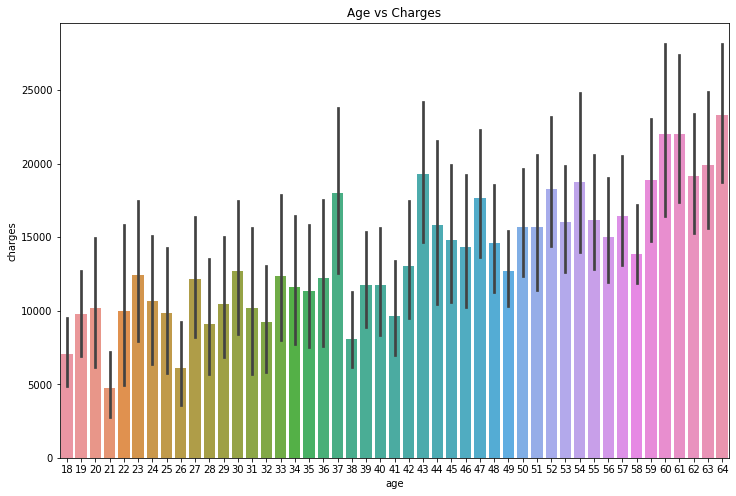

In [8]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'age', y = 'charges', data = dataset)
plt.title("Age vs Charges")

Text(0.5, 1.0, 'Age vs Charges')

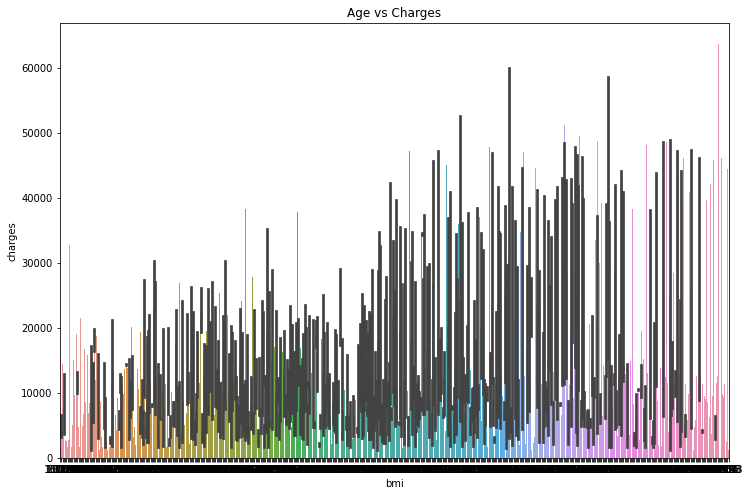

In [9]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'bmi', y = 'charges', data = dataset)
plt.title("Age vs Charges")

Text(0.5, 1.0, 'Age vs Charges')

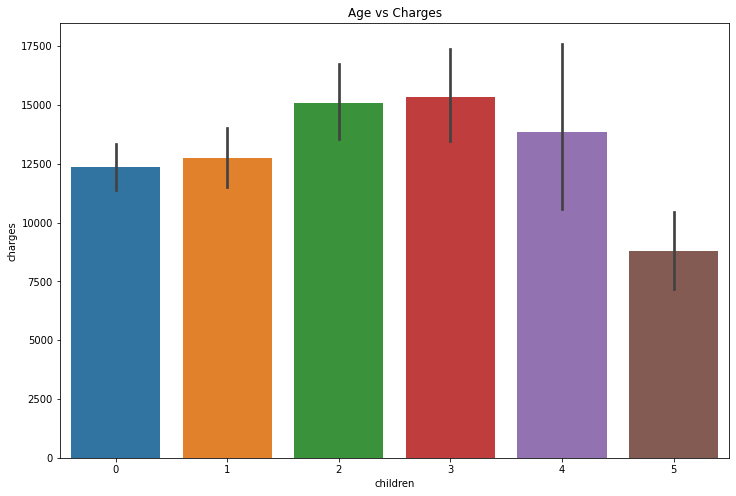

In [10]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'children', y = 'charges', data = dataset)
plt.title("Age vs Charges")

Text(0.5, 1.0, 'Age vs Charges')

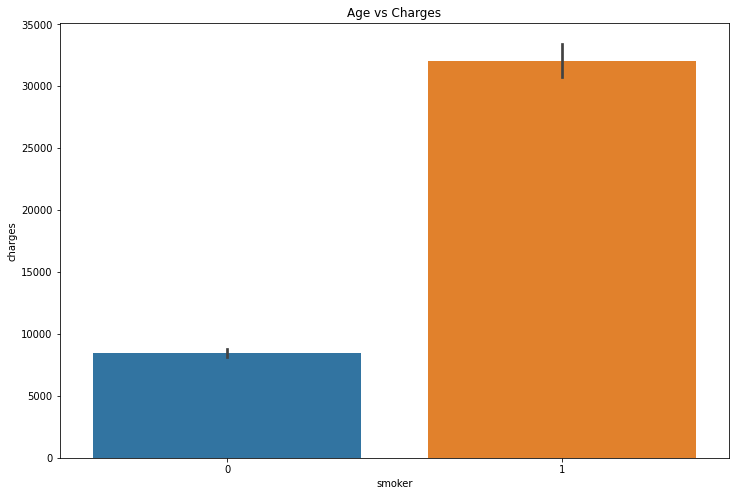

In [11]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'smoker', y = 'charges', data = dataset)
plt.title("Age vs Charges")

Text(0.5, 1.0, 'Age vs Charges')

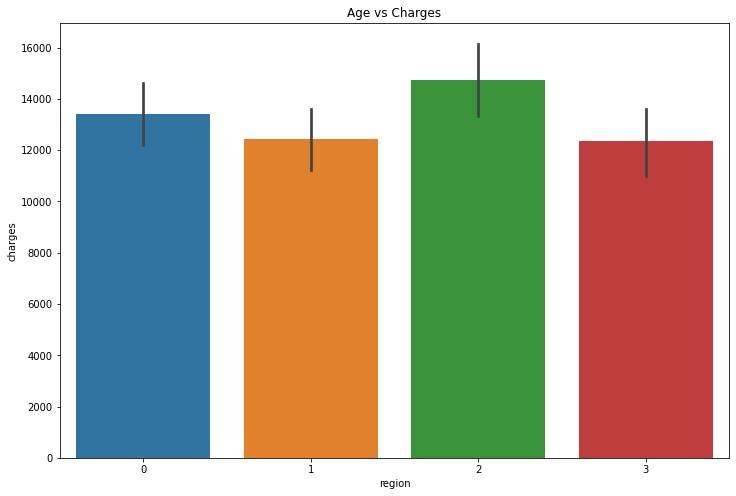

In [12]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'region', y = 'charges', data = dataset)
plt.title("Age vs Charges")

In [13]:
#Dropping least important feature of the dataset
dataset = dataset.drop('region', axis = 1)

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['sex'] = le.fit_transform(dataset['sex'])
dataset['smoker'] = le.fit_transform(dataset['smoker'])

In [15]:
dataset.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [16]:
X = dataset.iloc[:,:5]
y = dataset.iloc[:,5]
print(X.shape)
print(y.shape)

(1338, 5)
(1338,)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

In [18]:
from sklearn.preprocessing import StandardScaler
# creating a standard scaler
sc = StandardScaler()
# feeding independents sets into the standard scaler
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [19]:
# Linear Regression
from sklearn.linear_model import LinearRegression
# creating the Linear Regression model
lR = LinearRegression()
# # feeding the training data to the model
lR.fit(X_train, y_train)
y_pred_lR = lR.predict(X_test)
lR.score(X_train,y_train)

0.7463716002316689

In [20]:
from sklearn.svm import SVR
# creating the model
svr = SVR()
# feeding the training data to the model
svr.fit(X_train, y_train)
# predicting the test set results
y_pred_svr = svr.predict(X_test)
svr.score(X_train,y_train)

-0.09361994960428022

In [21]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)
# Predicting a new result
y_pred = regressor.predict(X_test)
regressor.score(X_train,y_train)

0.9640086046250348